In [478]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [479]:
# Cargar el DataFrame 
crimes_df = pd.read_csv("./Guardados/clean_crime_rate.csv")

# Muestreo de las columnas del DataFrame
crimes_df.head() 


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,lat,lon
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,41.0,...,36.0,43.0,30.0,40.0,40.0,34.0,43.0,26.0,21.8818,-102.2916
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,201.0,...,121.0,166.0,160.0,151.0,178.0,133.0,121.0,107.0,21.8818,-102.2916
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,19.0,...,13.0,19.0,12.0,15.0,19.0,22.0,10.0,8.0,21.8818,-102.2916
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),1.0,...,3.0,0.0,0.0,3.0,2.0,1.0,4.0,2.0,21.8818,-102.2916
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.8818,-102.2916


In [480]:
# Filtrar el DataFrame para Aguascalientes
aguascalientes_df = crimes_df[crimes_df['Entidad'] == 'Aguascalientes']

# Agrupar por 'Tipo de delito' y contar los casos
delitos_count_aguascalientes = aguascalientes_df.groupby('Tipo de delito').size()

# Mostrar el conteo por tipo de delito en Aguascalientes
print("Conteo por Tipo de Delito en Aguascalientes:")
print(delitos_count_aguascalientes)

# Si quieres también obtener la suma total de delitos en Aguascalientes
total_delitos_aguascalientes = delitos_count_aguascalientes.sum()
print("\nTotal de Delitos en Aguascalientes:", total_delitos_aguascalientes)


Conteo por Tipo de Delito en Aguascalientes:
Tipo de delito
Aborto                                                                             9
Abuso de confianza                                                                 9
Allanamiento de morada                                                             9
Amenazas                                                                           9
Contra el medio ambiente                                                           9
Corrupción de menores                                                             63
Daño a la propiedad                                                                9
Delito sexual                                                                     27
Delitos cometidos por servidores públicos                                          9
Despojo                                                                            9
Electorales                                                                        9
Evasi

Para nuestro caso, elegimos que las columnas que nos eran más relevantes para categorizar por grupos fueron 'Entidad', 'Tipo de delito', 'Subtipo de delito', 'Sexo/Averiguación previa', 
    'Rango de edad', 'Bien jurídico afectado'

In [481]:

# Crear instancias de LabelEncoder
le_delito = LabelEncoder()
le_subtipo = LabelEncoder()
le_sexo = LabelEncoder()
le_edad = LabelEncoder()
le_bien = LabelEncoder()

# Codificar las columnas
crimes_df['Tipo de delito_codificado'] = le_delito.fit_transform(crimes_df['Tipo de delito'])
crimes_df['Subtipo de delito_codificado'] = le_subtipo.fit_transform(crimes_df['Subtipo de delito'])
crimes_df['Sexo_codificado'] = le_sexo.fit_transform(crimes_df['Sexo/Averiguación previa'])
crimes_df['Rango de edad_codificado'] = le_edad.fit_transform(crimes_df['Rango de edad'])
crimes_df['Bien jurídico afectado_codificado'] = le_bien.fit_transform(crimes_df['Bien jurídico afectado'])

In [482]:
# Preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler

# Normalización de datos usando MinMaxScaler()
# Selecciona las columnas numéricas
numerical_columns = ['Tipo de delito_codificado', 'Subtipo de delito_codificado', 'Sexo_codificado', 'Rango de edad_codificado', 'Bien jurídico afectado_codificado']
# Inicializa el escalador Min-Max
scaler = MinMaxScaler()
# Aplica el escalado a las columnas numéricas
crimes_df[numerical_columns] = scaler.fit_transform(crimes_df[numerical_columns])
# Verifica la normalización
display(crimes_df[numerical_columns].head())


,Tipo de delito_codificado,Subtipo de delito_codificado,Sexo_codificado,Rango de edad_codificado,Bien jurídico afectado_codificado
0,0.027778,0.016667,0.000000,0.50,0.0
1,0.166667,0.133333,0.000000,0.50,0.0
2,0.250000,0.166667,0.000000,0.50,0.0
3,0.333333,0.216667,0.333333,0.00,0.0
4,0.333333,0.216667,0.333333,0.25,0.0


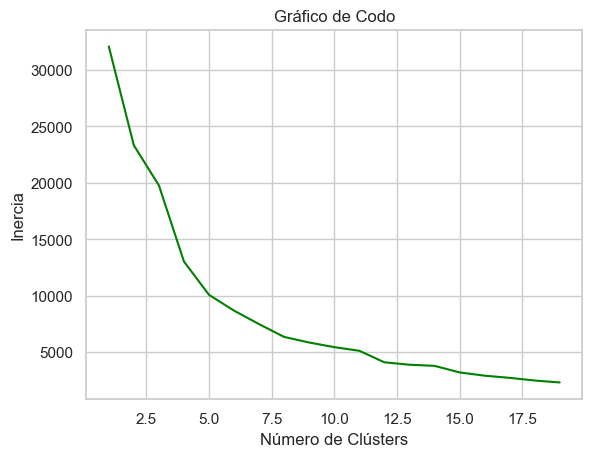

In [483]:
# Definición de los valores X
X = np.array(crimes_df[['Tipo de delito_codificado', 'Subtipo de delito_codificado', 'Sexo_codificado', 'Rango de edad_codificado', 'Bien jurídico afectado_codificado']])

# Definición de los valores y (si deseas predecir la 'Entidad' o cualquier otra columna)
y = np.array(crimes_df['Entidad'])

# Determinación del valor K
# Define el rango de valores para K (el número de clusters) que se probarán, desde 1 hasta 19
Nc = range(1, 20) 

# Crea una lista de objetos KMeans, cada uno configurado con un número diferente de clusters
kmeans = [KMeans(n_clusters=i, random_state=42) for i in Nc] 

# Calcula y almacena la inercia para diferentes valores de K, que se usará para trazar el gráfico de codo
inertia = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

# Gráfico de Codo
plt.plot(Nc, inertia, color='green')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')
plt.title('Gráfico de Codo')
plt.show()



Los valores de los centroides son: 
 [[0.44308279 0.3125817  0.46405229 0.16176471 0.64705882]
 [0.44980507 0.31842105 0.73684211 0.84649123 0.62865497]
 [0.73108747 0.63510638 0.0070922  0.50531915 0.04964539]
 [0.83333333 0.74333333 0.5        0.125      0.78333333]
 [0.83333333 0.74333333 1.         1.         0.78333333]
 [0.72743056 0.61822917 0.41666667 0.734375   0.75520833]]


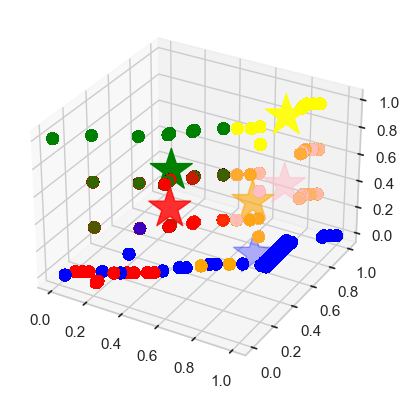

In [484]:
"""
Para nuestro ejemplo, seleccionamos el valor de K = 6f ya que es donde aproximadamente comienza
a suavizarse.
"""

# Entrenamiento del modelo
#Aplicación del Modelo K-Means
kmeans = KMeans(n_clusters = 6).fit(X)
#kmeans.cluster_centers_almacena las coordenadas de los centroides de los clusters generados por el modelo.
centroids = kmeans.cluster_centers_
print("Los valores de los centroides son: \n", centroids)

#Etiquetas de cada punto de los datos
labels = kmeans.predict(X)
#Determinación de los centroides
C = kmeans.cluster_centers_
# colores = []
colores = ['red','green','blue','pink','yellow', 'orange'] 
asignar = []
for row in labels:
    asignar.append(colores[row])

#Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)
plt.show()

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_32938/3443231660.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


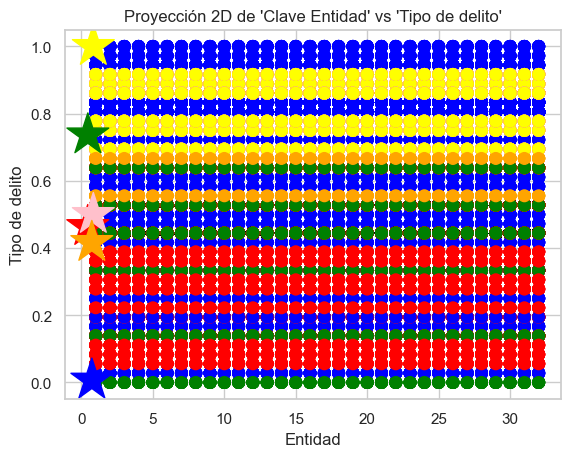

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_32938/3443231660.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


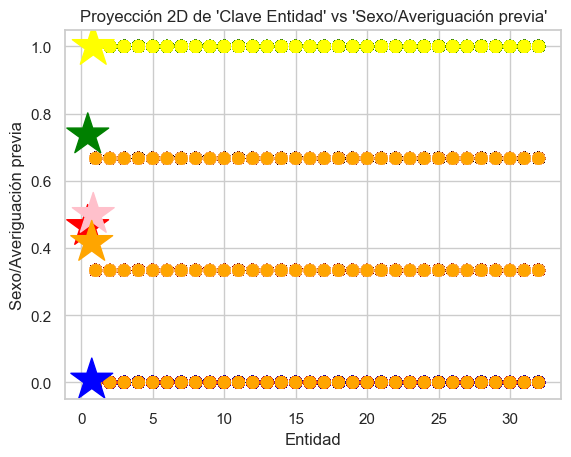

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_32938/3443231660.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


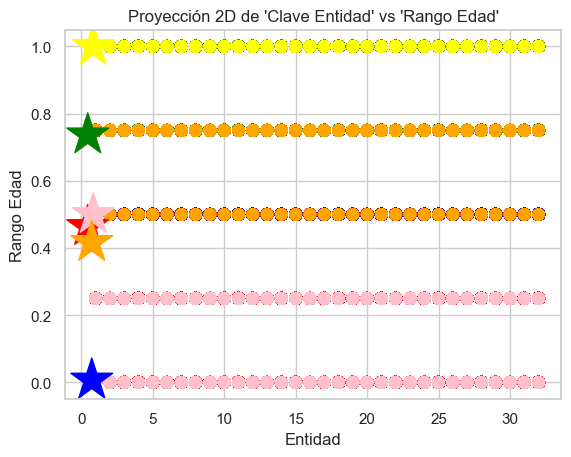

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_32938/3443231660.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


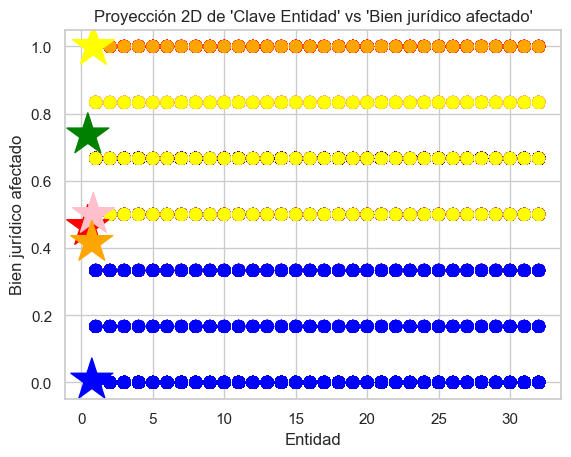

In [485]:

# Proyección a 2D con 'Entidad' y 'Tipo de delito'
f1 = crimes_df['Clave_Ent'].values
f2 = crimes_df['Tipo de delito_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  # Centros de los clústeres en color negro
plt.xlabel("Entidad")
plt.ylabel("Tipo de delito")
plt.title("Proyección 2D de 'Clave Entidad' vs 'Tipo de delito'")
# plt.savefig('./Guardados/Proyeccion_Entidad_Tipo_de_delito.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

# Proyección a 2D con 'Subtipo de delito' y 'Sexo/Averiguación previa'
f1 = crimes_df['Clave_Ent'].values
f2 = crimes_df['Sexo_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  # Centros de los clústeres en color negro
plt.xlabel("Entidad")
plt.ylabel("Sexo/Averiguación previa")
plt.title("Proyección 2D de 'Clave Entidad' vs 'Sexo/Averiguación previa'")
# plt.savefig('./Guardados/Proyeccion_Subtipo_Sexo.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

# Proyección a 2D con 'Rango de edad' y 'Bien jurídico afectado'
f1 = crimes_df['Clave_Ent'].values
f2 = crimes_df['Rango de edad_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  # Centros de los clústeres en color negro
plt.xlabel("Entidad")
plt.ylabel("Rango Edad")
plt.title("Proyección 2D de 'Clave Entidad' vs 'Rango Edad'")
# plt.savefig('./Guardados/Proyeccion_Rango_Bien_juridico.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()


# Proyección a 2D con 'Rango de edad' y 'Bien jurídico afectado'
f1 = crimes_df['Clave_Ent'].values
f2 = crimes_df['Bien jurídico afectado_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  # Centros de los clústeres en color negro
plt.xlabel("Entidad")
plt.ylabel("Bien jurídico afectado")
plt.title("Proyección 2D de 'Clave Entidad' vs 'Bien jurídico afectado'")
# plt.savefig('./Guardados/Proyeccion_Rango_Bien_juridico.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()


In [486]:
# 8. Crear un DataFrame con las etiquetas de los clusters
copy = pd.DataFrame()
copy['Entidad'] = crimes_df['Entidad'].values
copy['label'] = labels

# 9. Contar los usuarios por cada cluster
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores[:len(np.unique(labels))]
cantidadGrupo['cantidad'] = copy.groupby('label').size().values  # Asegurarnos de que la cantidad esté correctamente asignada

# Mostrar el número de usuarios por cada cluster
print("La cantidad de usuarios en cada clúster es:")
display(cantidadGrupo)


La cantidad de usuarios en cada clúster es:


,color,cantidad
0,red,29376
1,green,16416
2,blue,13536
3,pink,11520
4,yellow,2880
5,orange,9216


In [487]:
# Asignar las etiquetas de los clusters al DataFrame
crimes_df['Cluster'] = labels  # Aquí añadimos la columna 'Cluster' con las etiquetas

# Filtramos los datos de 'Aguascalientes'
aguascalientes_data = crimes_df[crimes_df['Entidad'] == 'Aguascalientes']

# Descripción de los clusters para 'Aguascalientes'
# Iterar sobre los clusters y obtener estadísticas
for i in range(6):  # Asumiendo que tienes 7 clusters
    print(f"Cluster {i} en Aguascalientes:")
    
    # Filtrar las filas correspondientes a este cluster
    cluster_data = aguascalientes_data[aguascalientes_data['Cluster'] == i]
    
    # Calcular el tipo de delito más común
    most_common_delito = int(cluster_data['Tipo de delito_codificado'].mode()[0])  # Convertir a entero
    decoded_delito = le_delito.inverse_transform([most_common_delito])[0]
    print(f"  Tipo de delito más común: {decoded_delito}")
    
    # Calcular el rango de edad más común
    most_common_edad = int(cluster_data['Rango de edad_codificado'].mode()[0])  # Convertir a entero
    decoded_edad = le_edad.inverse_transform([most_common_edad])[0]
    print(f"  Rango de edad más común: {decoded_edad}")
    
    # Calcular el sexo más común
    most_common_sexo = int(cluster_data['Sexo_codificado'].mode()[0])  # Convertir a entero
    decoded_sexo = le_sexo.inverse_transform([most_common_sexo])[0]
    print(f"  Sexo más común: {decoded_sexo}")
    
    # Calcular el bien jurídico afectado más común
    most_common_bien = int(cluster_data['Bien jurídico afectado_codificado'].mode()[0])  # Convertir a entero
    decoded_bien = le_bien.inverse_transform([most_common_bien])[0]
    print(f"  Bien jurídico afectado más común: {decoded_bien}")
    
    print("-" * 40)





Cluster 0 en Aguascalientes:
  Tipo de delito más común: Aborto
  Rango de edad más común: Adultos (18 y más)
  Sexo más común: Averiguación previa
  Bien jurídico afectado más común: El patrimonio
----------------------------------------
Cluster 1 en Aguascalientes:
  Tipo de delito más común: Aborto
  Rango de edad más común: Adultos (18 y más)
  Sexo más común: Averiguación previa
  Bien jurídico afectado más común: El patrimonio
----------------------------------------
Cluster 2 en Aguascalientes:
  Tipo de delito más común: Aborto
  Rango de edad más común: Adultos (18 y más)
  Sexo más común: Averiguación previa
  Bien jurídico afectado más común: El patrimonio
----------------------------------------
Cluster 3 en Aguascalientes:
  Tipo de delito más común: Aborto
  Rango de edad más común: Adultos (18 y más)
  Sexo más común: Averiguación previa
  Bien jurídico afectado más común: El patrimonio
----------------------------------------
Cluster 4 en Aguascalientes:
  Tipo de delit